# Classification 
Ideas to try 
- [] MinMax scaling?

In [1]:
# import GEOparse
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from sklearn.decomposition import PCA
import scipy
from scipy.sparse.linalg import svds 

In [2]:
data = pd.read_csv("mirnas_all_nov21.txt", sep="\t")
labels = pd.read_csv("mirnas_all_labels_nov21.txt", sep="\t")

In [18]:
data.head().style.background_gradient(cmap='Blues')

In [3]:
labels.head()

Dataset_id  Class_id                                         Class_name  \
0   GSE11078         1  metastasis tumor of breast cancer lung metastasis   
1   GSE11078         1  metastasis tumor of breast cancer lung metastasis   
2   GSE11078         1  metastasis tumor of breast cancer lung metastasis   
3   GSE11078         1  metastasis tumor of breast cancer lung metastasis   
4   GSE11078         1  metastasis tumor of breast cancer lung metastasis   

   Sample_id    Cancer_type Cancer_subtype Metastasis_status Primary_site  \
0  GSM279964  breast cancer            NaN               YES       breast   
1  GSM279974  breast cancer            NaN               YES       breast   
2  GSM279975  breast cancer            NaN               YES       breast   
3  GSM279977  breast cancer            NaN               YES       breast   
4  GSM279978  breast cancer            NaN               YES       breast   

  Metastasis_site      Sample_label  
0            lung  Metastasis Tumor  
1            lung  Metastasis Tumor  
2            lung  Metastasis Tumor  
3            lung  Metastasis Tumor  
4            lung  Metastasis Tumor

In [80]:
lungs=labels[labels['Metastasis_site']=='lung']['Sample_id']
lung_labels=labels[labels['Metastasis_site']=='lung']['Primary_site']

In [82]:
lung_labels.values().hist()

TypeError: 'numpy.ndarray' object is not callable

In [79]:
data[lungs]


GSM279964  GSM279974  GSM279975  GSM279977  GSM279978  GSM352095  \
0      10.022909   9.818693   9.647424   9.841938   9.190691  11.942972   
1       6.411660   5.665370   5.613482   5.190008   5.180046   9.124514   
2       6.181633   5.700626   5.786576   5.237599   6.131352   7.832843   
3       7.436633   7.053211   7.258615   7.562595   7.330315   9.293999   
4       2.887094   3.000947   3.121344   3.086248   3.480671   4.545640   
5       6.530688   5.567625   5.926589   6.009807   6.079571   7.871945   
6       4.953547   4.850121   5.084061   4.934906   4.934340   6.762140   
7       4.239834   4.163299   4.447667   3.977110   4.172685   5.872532   
8       6.801651   4.782156   5.922583   5.618470   8.398213   7.875702   
9       3.257942   3.052289   3.171283   3.282723   2.957008   5.573558   
10      7.502092   5.621489   6.151318   5.312640   5.700283   9.891830   
11      7.003113   6.827359   6.553197   7.214225   6.350096  10.742807   
12      5.222074   5.308472   5.325902   5.482010   5.289766   8.238578   
13      7.180142   7.010879   6.965427   6.894117   7.111423  10.981922   
14      7.997434   8.311447   8.204300   6.798974   7.332835   9.810789   
15      4.119991   3.954571   3.942190   3.853876   3.813349   7.056517   
16      4.349211   4.090578   4.557075   4.330075   4.053306   5.986321   
17      4.428855   4.422710   4.773258   3.738965   4.844952   6.593631   
18      6.988300   5.327938   6.039196   4.856342   5.745527   8.061947   
19      3.257168   5.068808   4.644192   3.865193   4.202371   4.646731   
20      3.235805   3.608098   3.689987   3.404816   3.528364   5.088111   
21      4.688249   4.554611   4.565730   4.535151   4.527715   6.787696   
22      4.340975   4.385104   4.285125   4.336183   4.218425   6.711076   
23      4.925128   4.828941   4.321901   4.762615   4.062196   8.170677   
24      4.211615   4.310208   4.586872   4.358045   3.721324   8.763278   
25      4.974165   4.632623   4.630018   4.782522   4.552337   7.336669   
26      7.836986   6.904438   7.179904   6.656774   8.833653   9.754559   
27      4.468461   4.422710   4.781835   4.845644   3.899088   6.574952   
28      6.331172   6.842267   6.751449   6.541617   6.509646   8.254531   
29      3.478112   3.284745   3.700568   3.446550   3.598543   6.645100   
...          ...        ...        ...        ...        ...        ...   
54645   5.168284   4.960184   5.024601   4.923872   5.181704   6.202530   
54646   3.151657   2.927722   3.047354   2.998369   3.163178   4.263357   
54647   2.864407   2.882559   2.897770   2.964829   2.908927   3.966677   
54648   2.880337   2.726995   2.814574   2.905822   2.794479   3.820523   
54649   2.871181   2.902803   2.723648   2.860728   2.863259   3.992802   
54650   2.703452   2.630523   2.621794   2.759948   2.899479   3.682602   
54651   2.852897   2.910316   2.956784   3.074726   3.114139   4.382744   
54652   2.882859   2.647054   2.670019   2.846564   2.692996   3.957778   
54653   2.824616   3.007094   3.024602   2.839818   2.778911   4.045570   
54654   3.088279   3.099448   3.241190   3.415005   3.052206   5.102076   
54655   2.758015   2.678452   2.897026   2.929486   2.607592   4.010703   
54656   3.112001   3.155679   3.147911   3.161537   3.185541   4.378568   
54657   3.426542   3.463955   3.418875   3.517242   3.602970   5.010872   
54658   3.137358   3.481013   4.039076   3.630704   3.594143   5.877720   
54659   3.323815   3.314908   3.293076   3.571082   3.249994   4.699341   
54660   7.833962   7.532176   7.676769   7.711759   7.798852   8.124342   
54661   6.877009   7.793527   7.768953   7.898533   7.610947   8.527211   
54662   7.462930   8.189569   8.239147   8.379929   8.391425   8.266783   
54663   9.502717   9.421839   9.392877   9.496919   9.478833   9.828590   
54664   9.156012   9.279680   9.359189   9.488802   9.329022   9.612546   
54665  11.550305  11.039745  11.111156  11.129243  11.101955  12.215268   
54666  11.541911  11.270965  11.

In [ ]:
labels[labels['Metastasis_site']=='lung']['Primary_site'].value_counts().plot(kind='bar', title='Primary site of lung metastasis')

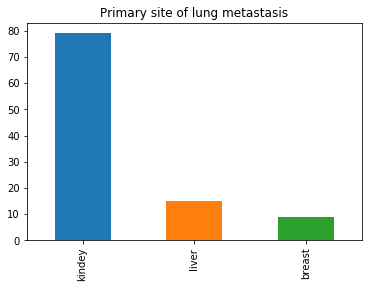

In [31]:
labels[labels['Metastasis_site']=='lung']['Primary_site'].value_counts().plot(kind='bar', title='Primary site of lung metastasis')

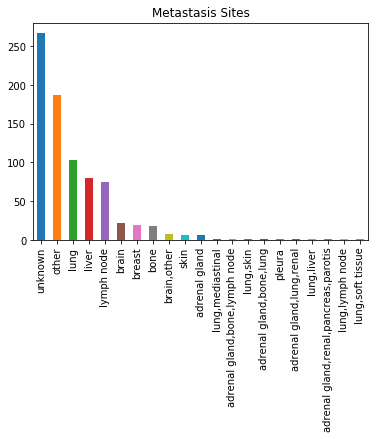

In [8]:
labels['Metastasis_site'].value_counts().plot(kind='bar', title='Metastasis Sites')

In [8]:
data=data.drop(['Unnamed: 0'], axis=1)
data.set_index('ID_REF')
data.head()

ID_REF  GSM279964  GSM279974  GSM279975  GSM279977  GSM279978  \
0  1007_s_at  10.022909   9.818693   9.647424   9.841938   9.190691   
1    1053_at   6.411660   5.665370   5.613482   5.190008   5.180046   
2     117_at   6.181633   5.700626   5.786576   5.237599   6.131352   
3     121_at   7.436633   7.053211   7.258615   7.562595   7.330315   
4  1255_g_at   2.887094   3.000947   3.121344   3.086248   3.480671   

   GSM279958  GSM279961  GSM279963  GSM279965    ...      GSM237966  \
0  10.214065  10.284017   7.008211   9.145673    ...      3739.4300   
1   6.396298   6.048790   5.671556   5.624627    ...      1205.6400   
2   7.620443   6.481317   5.739559   6.072929    ...        89.1387   
3   7.364233   7.421833   7.620457   7.507055    ...       787.3290   
4   2.905494   2.968376   3.221801   3.069448    ...        80.9794   

   GSM237967  GSM237968  GSM237969   GSM237970  GSM237972  GSM237973  \
0  2809.7200   2350.390  4079.3500  7302.00000  2898.6400  3494.1600   
1   883.9270   1418.130   721.6150   641.33900  1009.4900   788.6240   
2    81.6689    366.327   151.8190   191.91400   134.4140    67.0623   
3   848.5340   1454.480  1142.3000  1099.31000   762.8810   408.8580   
4    30.6078    103.337    36.9773     5.61104    92.5094    30.6197   

   GSM237974  GSM237977  GSM237978  
0  5225.7500  5917.5400  4249.9400  
1  1227.7000   662.1490  1315.5500  
2   104.0020    15.1112   119.9420  
3   684.3200   612.0700   809.6950  
4    17.8383    11.1367    93.9161  

[5 rows x 1495 columns]

In [9]:
len(data)

54675

In [10]:
# check to make sure there are no more repeats
count = 0
for i in data.columns:
    if "." in i:
        count+=1
print(count)

0


## Playing with SKlearn's PCA

In [11]:
data.shape

(54675, 1495)

In [10]:
#pca = PCA(n_components=1000)

In [11]:
#pca.fit(data)

In [12]:
#pca.n_features_

In [8]:
# jiaqi's PCA (very slow, uses eigsh)
def PCA(x, k):
    # Z = W * X
    # Z is weight matrix 
    # W is feature matrix 
    # X is input 
    
    # get zero mean, column-wise
    means = np.mean(x.T, axis=1)
    x_mean = x - means
    
    # covariance of centered/zero-mean matrix
    #V = np.cov(x_mean)
    V = x_mean.dot(x_mean.T) / (x_mean.shape[1]-1)

    # eigendecomposition 
    # y = lambda (eigen values)
    # u = eigen vectors 
    y, u = scipy.sparse.linalg.eigsh(V, k = k)
    
    # project data
    #P = u.T.dot(x_mean)
    

    # diagonalization to get feature matrix 
    #w = np.dot(np.diag(1/np.sqrt(y)), u.T)
    
    # w is features 
    #w = np.diag( 1.0/np.sqrt(y)).dot(u.T)
    w = np.linalg.inv(np.diag(np.sqrt(y))).dot(u.T)
    print(np.diag(np.sqrt(y)).shape)
    # check identity 
    # print(np.round(np.dot(np.dot(w,V),w.T),3))
    
    # z is weights 
    z = np.dot(w, x_mean)
    
    return w, z, y, u

In [12]:
# tiffany's PCA, uses SVD
def PCA(PCA_K, input_data):

    total_dim, sample_n = input_data.shape

    data_mean = np.reshape(np.mean(input_data, axis=1),(total_dim,1))
    data_demean = np.subtract(input_data, data_mean)

    u, s, vt = svds(data_demean, k=PCA_K)

    PCA_weights = np.matmul(np.transpose(u), data_demean)
    
    return PCA_weights, u, s, data_mean


In [13]:
# will need these to recreate data frame later
data_heading=data.columns
id_refs=data['ID_REF']

In [14]:
np_data = np.array(data)[:,1:].astype(float)

In [15]:
np_data.shape

(54675, 1494)

In [16]:
# #s[300:373]
# temp = np_data[:1000,:1000]
# temp.shape

In [17]:
weights, u, s, mean = PCA(45,np_data)

In [62]:
# pca_data = np.matmul(np.transpose(u[:,300:373]), np.subtract(np_data,mean))
# pca_data = np.matmul(np.transpose(u), np.subtract(np_data,mean))

In [42]:
weights.shape

(45, 1494)

### playing around with pca
s is the singular values 
we chose cut off of ~ 50-73

In [18]:
max(s)

13755318.951722275

In [19]:
s

array([  353789.69213596,   356427.94872781,   357768.59051499,
         361794.3675092 ,   366396.33405258,   372211.77921855,
         377261.07029953,   381839.79119024,   382896.0083634 ,
         394781.70443517,   398961.2611883 ,   404375.87312144,
         413572.51033543,   417131.04441553,   423664.18196122,
         426425.85703678,   438324.832601  ,   444250.38952885,
         462790.1290533 ,   468229.48649738,   470169.99148219,
         478057.2426788 ,   493427.29956282,   509154.71939807,
         517787.79036014,   535128.71406437,   541646.88211713,
         565484.16066903,   592393.35279477,   606109.44211082,
         636171.72686824,   670855.43234865,   724555.79064551,
         736327.22641975,   799568.86234406,   929561.06852595,
         999775.62754453,  1092817.16062969,  1125482.07981454,
        1154183.59176946,  1357970.92699322,  1482260.51405185,
        1861043.38416325,  2012201.076743  , 13755318.95172228])

In [20]:
cut_off=250749

In [21]:
len(s[s>cut_off])

45

<Container object of 45 artists>

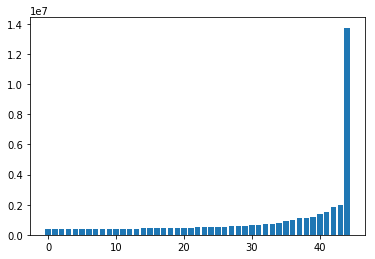

In [22]:
plt.bar(xrange(0,len(s[s>cut_off])), s[s>cut_off])

#### pick 45 after testing

### After playing with the number of features, for random forest, using 30 features produces the best result

In [23]:
#pca_data = np.matmul(np.transpose(u[:,470:]), np.subtract(np_data,mean))
pca_data = np.matmul(np.transpose(u), np.subtract(np_data,mean))

In [24]:
pca_data.shape

(45, 1494)

## Split into train/test

In [25]:
pd_pca=pd.DataFrame(pca_data)

In [54]:
# data_heading=data.columns
# id_refs=data['ID_REF']

In [26]:
# idk i just realized we dont need to make it into a pandas data frame again lol 
pd_pca.columns=data.columns[1:]
pd_pca['ID_REF'] = id_refs

In [27]:
pd_pca.head()

GSM279964   GSM279974   GSM279975   GSM279977   GSM279978   GSM279958  \
0  -28.846279  -30.135386  -31.535076  -37.437735  -31.211790  -37.439793   
1 -195.830698 -203.077735 -201.532508 -195.769204 -193.467953 -200.625638   
2 -148.955227 -154.602034 -154.769428 -152.361446 -154.284939 -155.455617   
3  -95.845848 -101.289905 -102.705655  -99.655439 -100.142098  -99.424914   
4   -8.684485  -15.405523  -15.454534  -12.015679  -18.309333  -19.625140   

    GSM279961   GSM279963   GSM279965   GSM279966    ...         GSM237967  \
0  -32.798388  -27.131674  -35.292899  -30.479610    ...      -9132.082116   
1 -198.754098 -197.893414 -198.039148 -192.550362    ...     -10499.110132   
2 -155.528796 -153.427510 -151.768323 -156.571195    ...      11306.914936   
3  -95.462979 -100.204324  -98.218397 -107.177684    ...      28830.491031   
4  -21.728217  -13.985444  -13.727021  -16.585946    ...      14516.239347   

      GSM237968     GSM237969     GSM237970     GSM237972     GSM237973  \
0   2107.506226  -4525.543530  12105.001977  13669.953384  -9106.379793   
1   7676.814275  -1070.781260 -15246.194880  -7326.321371  -3221.270065   
2  23304.041671  28055.480581   -112.115028   3356.097313   1801.925949   
3 -11775.996279  -3091.573655  -8712.727410  -1372.465422   3943.605170   
4  -5134.007289  -6456.465809   1107.350369  -6663.244728  12808.056740   

      GSM237974     GSM237977     GSM237978     ID_REF  
0  14078.751745 -12076.476980   6435.228986  1007_s_at  
1 -10605.323882 -59217.321755   9279.213768    1053_at  
2   2137.378829 -21464.004705  16109.728791     117_at  
3  15217.043981  20331.245424   3333.373868     121_at  
4  -3917.429701  27537.582549 -12698.544943  1255_g_at  

[5 rows x 1495 columns]

In [28]:
pd_pca.head().style.background_gradient(cmap='Blues')

In [29]:
#pd_pca.to_csv("mirnas_all_pca_500_88.txt", sep="\t")

In [30]:
# need data to be back in numpy to work with lolol
pca_data.shape

(45, 1494)

In [31]:
# get labels 
sample_labels=labels['Sample_label'].values

In [32]:
sample_labels = ['Normal' if x=='Metastasis Normal' or x=='Primary Normal' else x for x in labels['Sample_label'].values]
sample_labels=np.asarray(sample_labels)

In [33]:
np.unique(sample_labels,return_counts=True)

(array(['Metastasis Tumor', 'Normal', 'Primary Tumor'], dtype='|S16'),
 array([ 243,   75, 1176]))

In [34]:
# train test split 
np.random.seed(69)
ii = np.random.rand(len(pca_data[0])) < 0.7 

# np_data = data.values
# np_types = types.values
# np_labels = labels.values

# # scaling data 
# from sklearn import preprocessing
# min_max_scaler = preprocessing.MinMaxScaler()
# np_data_min_max = min_max_scaler.fit_transform(np_data)

train = pca_data[:,ii]
test = pca_data[:,~ii]

train_labels = sample_labels[ii]
test_labels = sample_labels[~ii]

gsms=data.columns[1:]
train_gsm = gsms[ii]
test_gsm=gsms[~ii]
# train = np_data[ii]
# test = np_data[~ii]

# pand_train = data[ii]
# pand_test = data[~ii]

In [35]:
def compute_confusion_matrix(true, pred):
    '''
    Compute a confusion matrix using numpy for two np.arrays
    true and pred.

    Results are identical (and similar in computation time) to: 
    "from sklearn.metrics import confusion_matrix"

    https://stackoverflow.com/questions/2148543/how-to-write-a-confusion-matrix-in-python
    '''
    # lol map of indicies for non-numeric classes
    count=0
    idx={}
    for i in np.unique(true):
        idx[i]=count
        count+=1
        
    K = len(np.unique(true)) # Number of classes 
    result = np.zeros((K, K))

    for i in range(len(true)):
        result[idx[true[i]]][idx[pred[i]]] += 1
        
    print("Accuracy: " + str(np.trace(result)/len(true)))

    return result

In [36]:
# idk just using this for now...can make our own CM stuff later 
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

/usr/lib64/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [61]:
rfmodel = RandomForestClassifier(n_estimators=100)
rf = rfmodel.fit(train.T, train_labels)

rf_pred = rf.predict(test.T)

# Model Accuracy, how often is the classifier correct
print("Accuracy: ", metrics.accuracy_score(test_labels, rf_pred))
rf_cm = confusion_matrix(test_labels, rf_pred,)

y_true = pd.Series(test_labels)
y_pred = pd.Series(rf_pred)

pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy:  0.8786516853932584


Predicted         Metastasis Tumor  Normal  Primary Tumor  All
True                                                          
Metastasis Tumor                47       0             28   75
Normal                           0      15             10   25
Primary Tumor                   16       0            329  345
All                             63      15            367  445

Accuracy: 0.8786516853932584


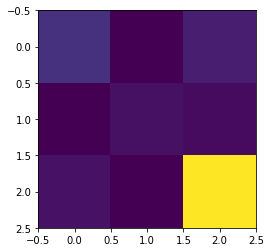

In [62]:
cm=compute_confusion_matrix(test_labels,rf_pred)
plt.imshow(cm)

In [63]:
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(test_labels, rf_pred)
print("kappa: ")
print(kappa)

kappa: 
0.6376112200271452


## Visualize the expression data

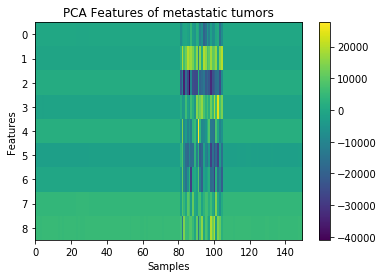

In [59]:
met_tumor_ids=labels[labels['Sample_label']=='Metastasis Tumor']['Sample_id'].values
normal_ids=labels[labels['Sample_label']=='Primary Normal']['Sample_id'].values
primary_ids=labels[labels['Sample_label']=='Primary Tumor']['Sample_id'].values
plt.imshow(pd_pca[normal_ids].values[:44,:],aspect='auto')
plt.imshow(pd_pca[met_tumor_ids].values[35:44,:150],aspect='auto')
plt.title("PCA Features of metastatic tumors")
plt.xlabel("Samples")
plt.ylabel("Features")
plt.colorbar()

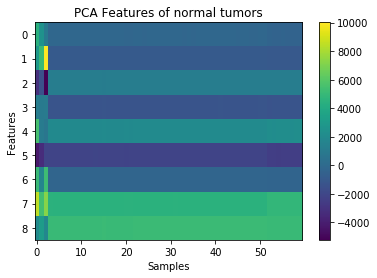

In [60]:
plt.imshow(pd_pca[normal_ids].values[35:44,:60],aspect='auto')
plt.xlabel("Samples")
plt.ylabel("Features")
plt.colorbar()
plt.title("PCA Features of normal tumors")

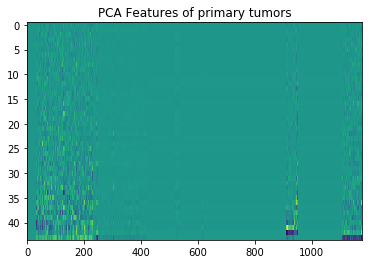

In [45]:
plt.imshow(pd_pca[primary_ids].values[:44,:],aspect='auto')
plt.title("PCA Features of primary tumors")

In [64]:
lr_x=[50, 40, 30, 35, 45]
lr_acc=[0.8,0.8157,0.788,0.811, 0.8179]
lr_kappa=[0.557,0.5861,0.532,0.569,0.5925]

rf_x=[50, 40, 30, 25]
rf_acc=[0.8696,0.8741,0.8786 , 0.8606]
rf_kappa=[0.6075,0.6287,0.6376,0.583]

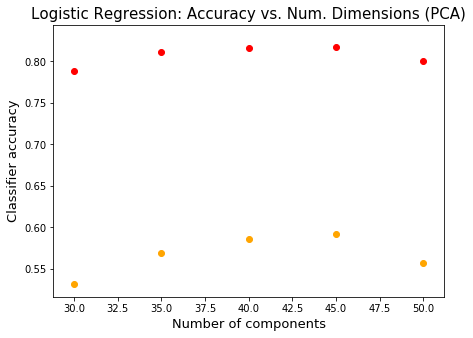

In [75]:
plt.figure(figsize=(7,5))
plt.title('Logistic Regression: Accuracy vs. Num. Dimensions (PCA)',fontsize=15)
plt.xlabel('Number of components',fontsize=13)
plt.ylabel('Classifier accuracy',fontsize=13)
plt.scatter(lr_x, lr_acc,c='red')
plt.scatter(lr_x, lr_kappa,c='orange')

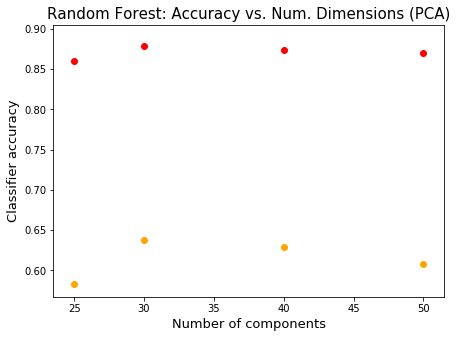

In [76]:
plt.figure(figsize=(7,5))
plt.title('Random Forest: Accuracy vs. Num. Dimensions (PCA)',fontsize=15)
plt.xlabel('Number of components',fontsize=13)
plt.ylabel('Classifier accuracy',fontsize=13)
plt.scatter(rf_x, rf_acc,c='red')
plt.scatter(rf_x, rf_kappa,c='orange')